In [1]:
%load_ext autoreload
%autoreload 2

INF = 1e30

import os
from os import path

# set the repository to the git repository
cwd = os.getcwd().split(os.path.sep)
while cwd[-1] != "AttentionGeometry":
    os.chdir("..")
    cwd = os.getcwd().split(os.path.sep)
print(os.getcwd())

c:\Users\loicf\Documents\IRISA\AttentionGeometry


In [2]:
# add the path of the source directory
import sys
sys.path.append(os.path.join(os.getcwd(), "src"))

In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.color_palette("flare", as_cmap=True)
from tqdm.notebook import tqdm

# from the environment
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
from bert_model import BertNliRegu
from bert_data_module.esnli import ESNLIDataModule
from bert_data_module.hatexplain import HateXPlainDataModule

# specific file for this notebook
from notebooks.BERT.utils.emb_geo import *

# E-SNLI

In [4]:
# load data and model
data_dir = os.path.join(".cache_bert", "datasets", "EsnliDataSet")

dm = ESNLIDataModule(cache=data_dir,
                   batch_size = 4,
                   num_workers = 4,
                   nb_data = 999 # multiple of three for the consistency
                   )

dm.prepare_data()

dm.setup(stage="test")

ckp = path.join(".cache_bert", "logs", "snli_igrida_trained", "0", "best.ckpt")
model = BertNliRegu.load_from_checkpoint(ckp)
model = model.to(DEVICE)
model = model.eval()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
c:\Users\loicf\miniconda3\envs\nlp\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: Metric `AUROC` will save all targets and predictions

In [5]:
res_ft = main(model, dm, 999)

In [6]:
mean_ft = res_ft.mean(axis=1)
sd_ft = res_ft.std(axis=1)

In [7]:
model = BertNliRegu()
model = model.to(DEVICE)
model = model.eval()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [8]:
res_pt = main(model, dm, 999)

In [9]:
mean_pt = res_pt.mean(axis=1)
sd_pt = res_pt.std(axis=1)

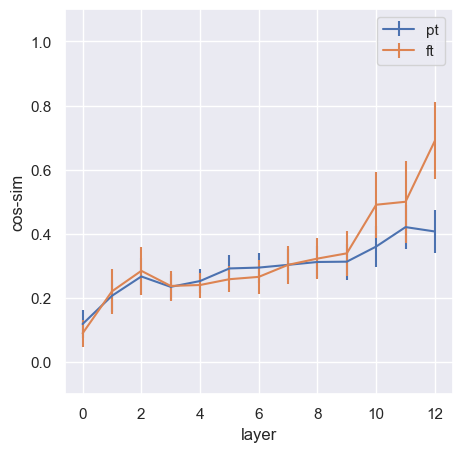

In [10]:
fig, ax = plt.subplots(1,1, figsize=(5, 5))
ax.set(
    ylim=(-0.1, 1.1),
    xlabel="layer",
    ylabel="cos-sim",
)
ax.errorbar(list(range(13)), mean_pt, yerr=sd_pt * 1.96, label="pt")
ax.errorbar(list(range(13)), mean_ft, yerr=sd_ft * 1.96, label="ft")
ax.legend()
plt.savefig(os.path.join(".cache_bert", "plots", "paper", "similarity_through_layers_esnli.png"))

In [14]:
mean_ft

array([0.08993789, 0.22083724, 0.28471625, 0.23760486, 0.24047156,
       0.258587  , 0.26585585, 0.3033336 , 0.3228502 , 0.33920956,
       0.4907083 , 0.49996132, 0.69011104], dtype=float32)

# Hatexplain

In [11]:
# load data and model
data_dir = os.path.join(".cache_bert", "datasets", "hatexplain")

dm = HateXPlainDataModule(
    cache_path=data_dir,
    batch_size = 4,
    num_workers = 4,
    nb_data = 999 # multiple of three for the consistency
)

dm.prepare_data()
dm.setup(stage="test")

ckp = path.join(".cache_bert", "logs", "hatexplain", "checkpoints", "best.ckpt")
model = BertNliRegu.load_from_checkpoint(ckp)
model = model.to(DEVICE)
model = model.eval()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [12]:
res_ft = main(model, dm, 999)

In [13]:
mean_ft = res_ft.mean(axis=1)
sd_ft = res_ft.std(axis=1)

In [14]:
model = BertNliRegu()
model = model.to(DEVICE)
model = model.eval()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [15]:
res_pt = main(model, dm, 999)

In [16]:
mean_pt = res_pt.mean(axis=1)
sd_pt = res_pt.std(axis=1)

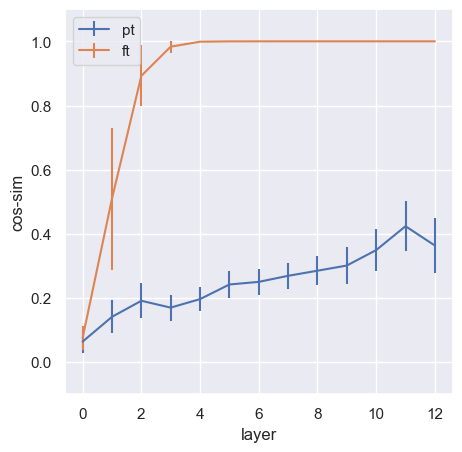

In [17]:
fig, ax = plt.subplots(1,1, figsize=(5, 5))
ax.set(
    ylim=(-0.1, 1.1),
    xlabel="layer",
    ylabel="cos-sim",
)
ax.errorbar(list(range(13)), mean_pt, yerr=sd_pt * 1.96, label="pt")
ax.errorbar(list(range(13)), mean_ft, yerr=sd_ft * 1.96, label="ft")
ax.legend()
plt.savefig(os.path.join(".cache_bert", "plots", "paper", "similarity_through_layers_hatexplain.png"))

C'est un résultat qui peut être rajouté en ouverture.